<a href="https://colab.research.google.com/github/Swetharajagopal1029/Respiratory-syndrome-predictor/blob/main/Accuracy_Paramaters_Improvisation_Review_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES:**

##LIBRARIES:

1.   PANDAS:Pandas is one of the tools in Machine Learning which is used for data cleaning and analysis. It has features which are used for exploring, cleaning, transforming and visualizing from data. Pandas is an open-source python package built on top of Numpy developed by Wes McKinney.

2. NUMPY:NumPy is very useful for performing mathematical and logical operations on Arrays. It provides an abundance of useful features for operations on n-arrays and matrices in Python.

3.   SEABORN:Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.

4.   MATPLOTLIB:Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

5.   SKLEARN OR SCIKIT LEARN:Simple and efficient tools for predictive data analysis.Accessible to everybody, and reusable in various contexts.Built on NumPy, SciPy, and matplotlib.Open source, commercially usable - BSD license.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import pandas.util.testing as tm
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import neighbors,metrics
from sklearn import ensemble
from sklearn.decomposition import PCA



**IMPORTING DATAFILES FROM GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**READ THE DATAFILE FROM DRIVE**

In [ ]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Patient_details.csv")

**REPRESENTATION OF COLUMNS**

In [ ]:
df.columns

Index(['Patient ID', 'SEX', 'AGE', 'Date', 'COVID-19 Infection',
       'SR_2 Folder thickness(mm)', 'SR_3 Folder thickness(mm)',
       'SR_4 Folder thickness(mm)'],
      dtype='object')

**RENAME THE COLUMNS**

In [ ]:
col_names=["Patient_id","Sex","Age","Date","COVID_Prediction","SR_2","SR_3","SR_4"]

**FETCHING THE DATA FROM CSV FILE**

In [ ]:
df=pd.read_csv('drive/My Drive/Colab Notebooks/Patient_details.csv',header=0,names=col_names)

In [ ]:
###HEAD-Displaying the top 5 records###
df.head(5)

,Patient_id,Sex,Age,Date,COVID_Prediction,SR_2,SR_3,SR_4
0,patient1,F,053Y,20200407,Positive,4.0,6.0,1.5
1,patient3,M,066Y,20200418,Positive,5.0,5.0,5.0
2,patient5,M,035Y,20200328,Positive,6.0,5.0,5.0
3,patient7,F,060Y,20200324,Positive,6.0,5.0,5.0
4,patient9,F,034Y,20200325,Positive,6.0,5.0,5.0


In [ ]:
###INFO()-Represent the text file in Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Patient_id        377 non-null    object 
 1   Sex               377 non-null    object 
 2   Age               377 non-null    object 
 3   Date              377 non-null    int64  
 4   COVID_Prediction  377 non-null    object 
 5   SR_2              375 non-null    float64
 6   SR_3              374 non-null    float64
 7   SR_4              370 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 23.7+ KB


In [ ]:
col_to_drop=['Date','Patient_id']

In [ ]:
###DROP()-It is used to drop the columns(axis=1)/Rows(axis=0)
df=df.drop(columns=col_to_drop,axis=1)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               377 non-null    object 
 1   Age               377 non-null    object 
 2   COVID_Prediction  377 non-null    object 
 3   SR_2              375 non-null    float64
 4   SR_3              374 non-null    float64
 5   SR_4              370 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.8+ KB


**DEFINING CLASSES IN BINARY FORMAT(PREDICTORS)**

In [ ]:
def class_classification(val):
  if val=="Positive":
    return 1
  else:
    return 0

In [ ]:
###Applying class function on data###
df["COVID_Prediction"]=[class_classification(x) for x in df["COVID_Prediction"]]

In [ ]:
df.head(5)

,Sex,Age,COVID_Prediction,SR_2,SR_3,SR_4
0,F,053Y,1,4.0,6.0,1.5
1,M,066Y,1,5.0,5.0,5.0
2,M,035Y,1,6.0,5.0,5.0
3,F,060Y,1,6.0,5.0,5.0
4,F,034Y,1,6.0,5.0,5.0


In [ ]:
print (col_names)

['Patient_id', 'Sex', 'Age', 'Date', 'COVID_Prediction', 'SR_2', 'SR_3', 'SR_4']


In [ ]:
norm_col=['SR_2','SR_3','SR_4']

In [ ]:
#df[norm_col]=df[norm_col].apply(lambda x: ((x-x.min())/(x.max()-x.min())))

In [ ]:
###TAIL()-Displaying last 5 records###
df.tail(5)

,Sex,Age,COVID_Prediction,SR_2,SR_3,SR_4
372,F,059Y,0,6.0,1.5,1.5
373,F,034Y,0,6.0,1.5,1.5
374,F,048Y,0,6.0,1.5,1.5
375,F,033Y,0,6.0,1.5,1.5
376,F,050Y,0,6.0,1.5,1.5


**DATA VISUALISATION:**


 **Heat map** is an extremely powerful way to visualize relationships between variables in high dimensional space.

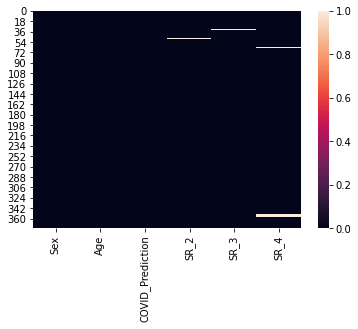

In [ ]:
sn.heatmap(df.isnull())

**DATA INTERPOLATION:**

Interpolation is also used to simplify complicated functions by sampling data points and interpolating them using a simpler function.

In [ ]:
### It will update mean value of the column in the empty records###
df['SR_2']=df['SR_2'].interpolate()
df['SR_3']=df['SR_3'].interpolate()
df['SR_4']=df['SR_4'].interpolate()

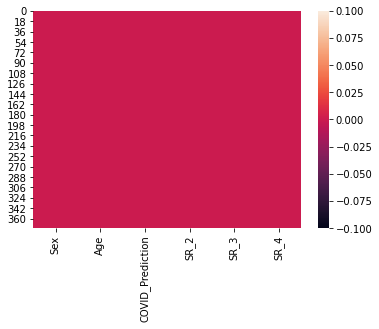

In [ ]:
sn.heatmap(df.isnull())

In [ ]:
###REPLACE()-Replace the values in string###
df["Age"]=df["Age"].str.replace("Y","")
###TO_NUMERIC()-To represent the values in numeric format###
df["Age"]=pd.to_numeric(df["Age"])
df.head()


,Sex,Age,COVID_Prediction,SR_2,SR_3,SR_4
0,F,53,1,4.0,6.0,1.5
1,M,66,1,5.0,5.0,5.0
2,M,35,1,6.0,5.0,5.0
3,F,60,1,6.0,5.0,5.0
4,F,34,1,6.0,5.0,5.0


**APPLY ONE HOT VECTOR ENCODING**

In [ ]:
###GET_DUMMIES()-Function will apply one hot vector encoding on the columns###
Dummy_COVID_Prediction=pd.get_dummies(df["Sex"])

In [ ]:
Dummy_COVID_Prediction.head()

,F,M
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [ ]:
Dummy_Age=pd.get_dummies(df["Age"])
Dummy_Age.head()

,10,11,12,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,73,75,76,77,78,79,82
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**DEFINING AGE BINS**

In [ ]:
df["Age_0_10"]=0
df["Age_10_20"]=0
df["Age_20_30"]=0
df["Age_30_40"]=0
df["Age_40_50"]=0
df["Age_50_60"]=0
df["Age_60_70"]=0
df["Age_70_80"]=0
df["Age_80_90"]=0



In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               377 non-null    object 
 1   Age               377 non-null    int64  
 2   COVID_Prediction  377 non-null    int64  
 3   SR_2              377 non-null    float64
 4   SR_3              377 non-null    float64
 5   SR_4              377 non-null    float64
 6   Age_0_10          377 non-null    int64  
 7   Age_10_20         377 non-null    int64  
 8   Age_20_30         377 non-null    int64  
 9   Age_30_40         377 non-null    int64  
 10  Age_40_50         377 non-null    int64  
 11  Age_50_60         377 non-null    int64  
 12  Age_60_70         377 non-null    int64  
 13  Age_70_80         377 non-null    int64  
 14  Age_80_90         377 non-null    int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 44.3+ KB


In [ ]:
###Bin classification###
for i,values in enumerate(df["Age"]):
  if values<10:
    df["Age_0_10"][i]=1
  elif values>=10 and values<20:
    df["Age_10_20"][i]=1
  elif values>=20 and values<30:
    df["Age_20_30"][i]=1
  elif values>=30 and values<40:
    df["Age_30_40"][i]=1
  elif values>=40 and values<50:
    df["Age_40_50"][i]=1
  elif values>=50 and values<60:
    df["Age_50_60"][i]=1
  elif values>=60 and values<70:
    df["Age_60_70"][i]=1
  elif values>=70 and values<80:
    df["Age_70_80"][i]=1
  else:
    df["Age_80_90"][i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/di

In [ ]:
###CONCAT()-It is used to concat the columns(axis=1)/rows(axis=0)###
df=pd.concat((df,Dummy_COVID_Prediction),axis=1)

In [ ]:
###DROP()-It is used to drop the columns(axis=1)/rows(axis=0)###
df=df.drop(["Sex","Age"],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   COVID_Prediction  377 non-null    int64  
 1   SR_2              377 non-null    float64
 2   SR_3              377 non-null    float64
 3   SR_4              377 non-null    float64
 4   Age_0_10          377 non-null    int64  
 5   Age_10_20         377 non-null    int64  
 6   Age_20_30         377 non-null    int64  
 7   Age_30_40         377 non-null    int64  
 8   Age_40_50         377 non-null    int64  
 9   Age_50_60         377 non-null    int64  
 10  Age_60_70         377 non-null    int64  
 11  Age_70_80         377 non-null    int64  
 12  Age_80_90         377 non-null    int64  
 13  F                 377 non-null    uint8  
 14  M                 377 non-null    uint8  
dtypes: float64(3), int64(10), uint8(2)
memory usage: 39.2 KB


In [ ]:
data1=[[(0,2),(1,3),(2,4),(3,1),(4,0),(5,0),(6,0),(7,0),(8,0),(9,0),(10,0),(11,0),(12,1),(13,0)]]
print(data1)

[[(0, 2), (1, 3), (2, 4), (3, 1), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 1), (13, 0)]]


In [ ]:
data1=np.array(data1)
print(data1)


[[[ 0  2]
  [ 1  3]
  [ 2  4]
  [ 3  1]
  [ 4  0]
  [ 5  0]
  [ 6  0]
  [ 7  0]
  [ 8  0]
  [ 9  0]
  [10  0]
  [11  0]
  [12  1]
  [13  0]]]


In [ ]:
data1.reshape(-1,1)

array([[ 0],
       [ 2],
       [ 1],
       [ 3],
       [ 2],
       [ 4],
       [ 3],
       [ 1],
       [ 4],
       [ 0],
       [ 5],
       [ 0],
       [ 6],
       [ 0],
       [ 7],
       [ 0],
       [ 8],
       [ 0],
       [ 9],
       [ 0],
       [10],
       [ 0],
       [11],
       [ 0],
       [12],
       [ 1],
       [13],
       [ 0]])

In [ ]:
###DROPNA()-It is used to drop the null records###
df=df.dropna()

**ESTIMATING GENDER COUNT**

In [ ]:
count_male=0
count_female=0
for values in df['F']:
  if values==0:
    count_male=count_male+1
  else:
    count_female=count_female+1

print(count_female,count_male)

185 192


**DATA VIRTUALISATION-ANALYZING THE GENDER COUNT**

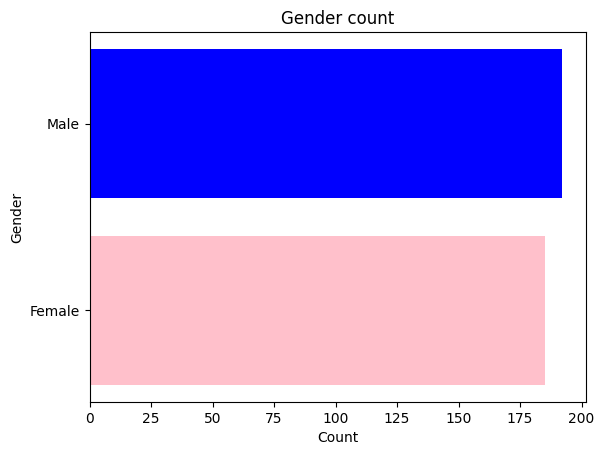

In [ ]:
np.random.seed(19680801)
plt.rcdefaults()
fig, ax = plt.subplots()
people = ('Male','Female')
y_pos = np.arange(len(people))
error = np.random.rand(len(people))
ax.barh(0, count_male, align='center',color='Blue')
ax.barh(1, count_female, align='center',color='Pink')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Gender count')
ax.set_ylabel('Gender')
plt.show()

**CORRELATION MATRIX:**

Statisticians and data analysts measure correlation of two numerical variables to find an insight about their relationships. On a dataset with many attributes, the set of correlation values between pairs of its attributes form a matrix which is called a correlation matrix.

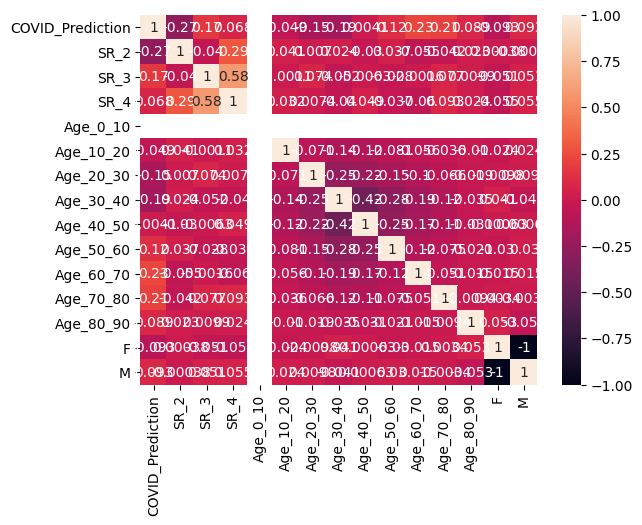

In [ ]:
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

**DATA SHUFFLING**

In [ ]:
df=shuffle(df)

In [ ]:
X=df.values
Y=df["COVID_Prediction"].values

In [ ]:
X

array([[1. , 5. , 6. , ..., 0. , 0. , 1. ],
       [1. , 5. , 6.5, ..., 0. , 0. , 1. ],
       [0. , 6. , 8. , ..., 0. , 0. , 1. ],
       ...,
       [0. , 6. , 5. , ..., 0. , 1. , 0. ],
       [0. , 6. , 1.5, ..., 0. , 1. , 0. ],
       [1. , 5. , 5. , ..., 0. , 0. , 1. ]])

In [ ]:
###DELETE()-It is used to delete the columns(axis=1)/rows(axis=0)###
X=np.delete(X,0,axis=1)

In [ ]:
X.shape

(377, 14)

In [ ]:
print(Y)

[1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1
 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0
 0 1 0 1 0 0 1]


**SPLITTING DATASET**

In [ ]:
from sklearn.model_selection import train_test_split
X_Train,Y_Train,X_Test,Y_Test=train_test_split(X,Y,test_size=0.2,random_state=1010)

In [ ]:
print (len(X_Train))

301


In [ ]:
print (len(Y_Train))

76


In [ ]:
print(len(X_Test))

301


In [ ]:
print(len(Y_Test))

76


In [ ]:
print(Y_Test)

[0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 1 0]


In [ ]:
print(X_Test)

[1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0
 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1]


In [ ]:
print(Y_Train)

[[5.  5.  1.5 ... 0.  0.  1. ]
 [6.  1.5 1.5 ... 0.  0.  1. ]
 [6.  6.  6.  ... 0.  1.  0. ]
 ...
 [6.  1.5 1.5 ... 0.  1.  0. ]
 [6.  5.  5.  ... 0.  1.  0. ]
 [6.  1.5 1.5 ... 0.  0.  1. ]]


In [ ]:
print(Y_Test)

[0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 1 0]


STANDARDIZATION:

 Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).




1.   STANDARD SCALER- Z= X-MEAN/SD
2.   MAX ABS SACLER=Z=|X-MIN(X)/MAX(X)-MIN(X)|
3.   MIN MAX SACLER=Z=X-MIN(X)/MAX(X)-MIN(X)



In [ ]:
X_Train.shape

(301, 14)

In [ ]:
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler
scaler = MaxAbsScaler()
###FIT()-Applying the standardization###
scaler.fit(X_Train)
###TRANSFORM()-It Reflects the value in data###
scaler.transform(X_Train)
scaler.transform(Y_Train)

array([[0.83333333, 0.625     , 0.1875    , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.1875    , 0.1875    , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.75      , 0.75      , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.1875    , 0.1875    , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.625     , 0.625     , ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.1875    , 0.1875    , ..., 0.        , 0.        ,
        1.        ]])

**INBUILT MODEL FUNCTIONS:**

1. FIT()-It is used to apply the model function over the data

2. SCORE()-It is used to display the accuracy factor of the data

3. PREDICT()-It is used to compare and estimate the values of the class

4. ROC CURVE-It is used to display the accuracy factor of the data with virtualization mode

5. CONFUSION MATRIX:
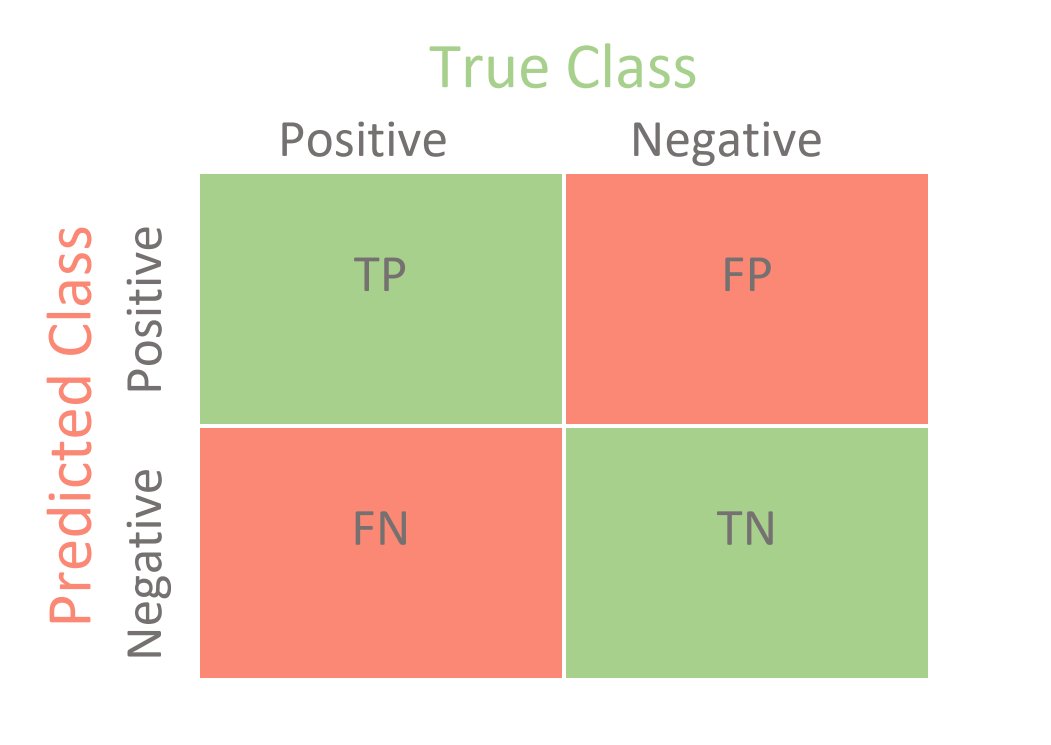

**TRAINING AND VALIDATION:**


**SUPPORT VECTOR MACHINE:**


Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

In [ ]:
str(X_Train)

'[[6. 5. 5. ... 0. 0. 1.]\n [6. 5. 5. ... 0. 1. 0.]\n [6. 6. 6. ... 0. 1. 0.]\n ...\n [6. 5. 5. ... 0. 0. 1.]\n [6. 8. 8. ... 0. 0. 1.]\n [6. 6. 6. ... 0. 1. 0.]]'

In [ ]:
SVM_clf=SVC(gamma='auto',kernel='poly',decision_function_shape='ovo')
SVM_clf.fit(X_Train,X_Test)
SVM_clf.score(Y_Train,Y_Test)

0.7763157894736842

In [ ]:
SVM_clf.predict(Y_Train)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

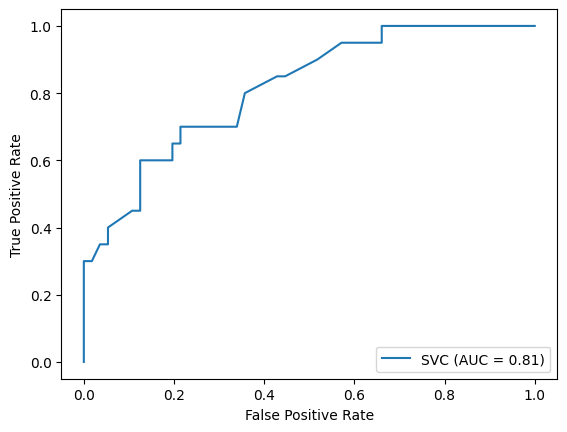

In [ ]:
 metrics.plot_roc_curve(SVM_clf, Y_Train,Y_Test)  
 plt.show()

SUPPORT VECTOR MACHINE CONFUSION MATRIX:

Confusion matrix, with normalization
[[50  6]
 [11  9]]


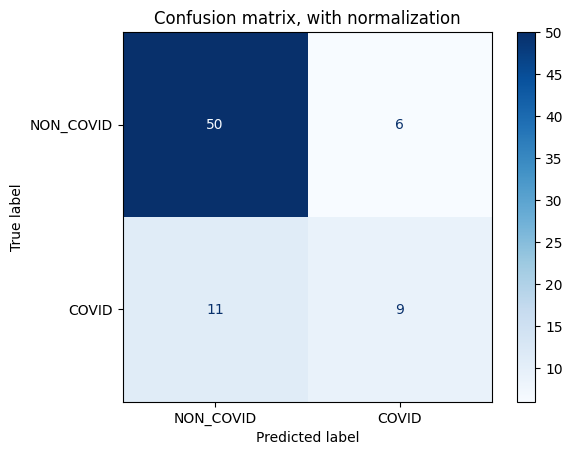

In [ ]:
class_names=['NON_COVID','COVID']
titles_options = [("Confusion matrix, with normalization", None),]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(SVM_clf, Y_Train, Y_Test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()

**RANDOM FOREST CLASSIFIER:**

The Random forest classifier creates a set of decision trees from a randomly selected subset of the training set. It is basically a set of decision trees (DT) from a randomly selected subset of the training set and then It collects the votes from different decision trees to decide the final prediction.

In [ ]:
rf_clf=ensemble.RandomForestClassifier(n_estimators=150, min_impurity_decrease=0.0)
rf_clf.fit(X_Train,X_Test)
rf_clf.score(Y_Train,Y_Test)

0.7894736842105263

In [ ]:
rf_clf.predict(Y_Train)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

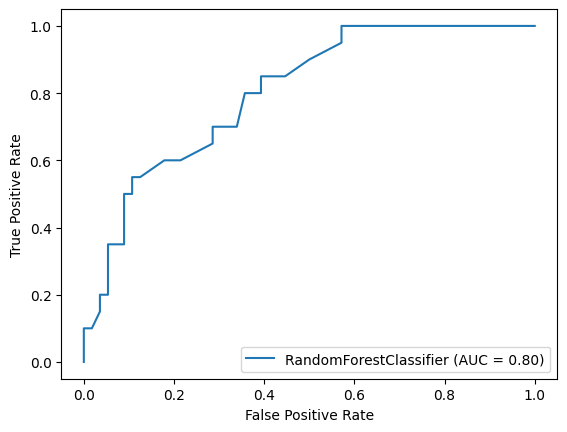

In [ ]:
 metrics.plot_roc_curve(rf_clf, Y_Train,Y_Test)  
 plt.show()

RANDOM FOREST CLASSIFIER-CONFUSION MATRIX:

Confusion matrix, with Normalization
[[49  7]
 [ 9 11]]


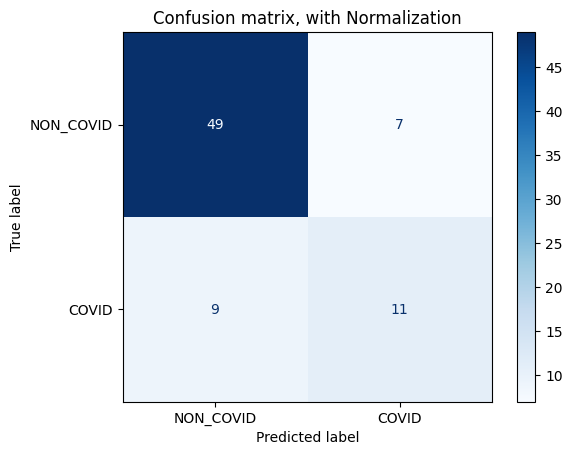

In [ ]:
class_names=['NON_COVID','COVID']
titles_options = [("Confusion matrix, with Normalization", None),]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(rf_clf, Y_Train, Y_Test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**EXTRA TREES CLASSIFIER:**

Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it’s classification result. In concept, it is very similar to a Random Forest Classifier and only differs from it in the manner of construction of the decision trees in the forest.

In [ ]:
etc_clf=ensemble.ExtraTreesClassifier(n_estimators=180,criterion='gini')
etc_clf.fit(X_Train,X_Test)
etc_clf.score(Y_Train,Y_Test)

0.8026315789473685

In [ ]:
etc_clf.predict(Y_Train)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

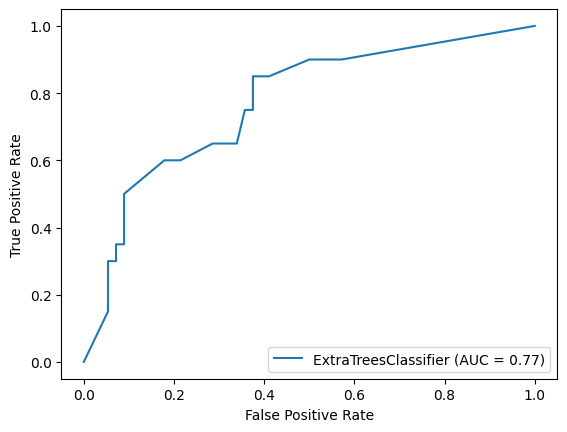

In [ ]:
 metrics.plot_roc_curve(etc_clf, Y_Train,Y_Test)  
 plt.show()

EXTRA TREES CLASSIFIER-CONFUSION MATRIX:

Confusion matrix, with Normalization
[[51  5]
 [10 10]]


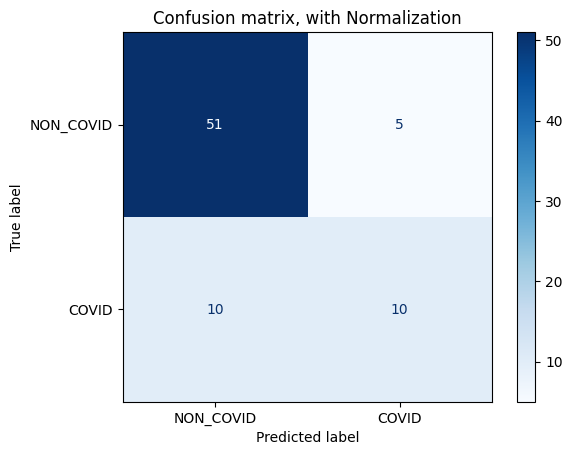

In [ ]:
class_names=['NON_COVID','COVID']
titles_options = [("Confusion matrix, with Normalization", None),]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(etc_clf, Y_Train, Y_Test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**K NEAREST NEIGHBOR(KNN):**


K Nearest Neighbor(KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. KNN algorithm used for both classification and regression problems. KNN algorithm based on feature similarity approach.

In [ ]:
KNN_clf=neighbors.KNeighborsClassifier(n_neighbors=2,weights='distance',p=1,algorithm='brute',n_jobs=5)
KNN_clf.fit(X_Train,X_Test)
KNN_clf.predict(Y_Train)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
KNN_clf.score(Y_Train,Y_Test)

0.7894736842105263

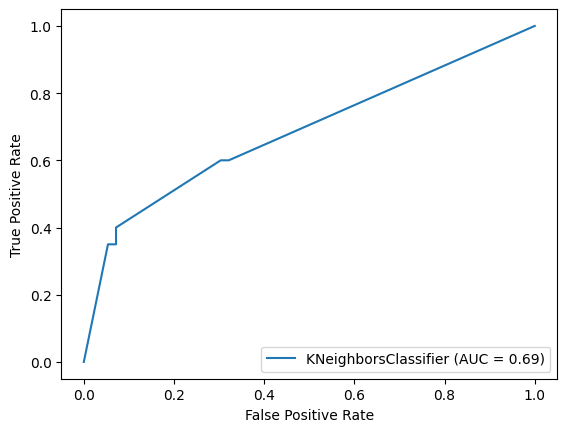

In [ ]:
 metrics.plot_roc_curve(KNN_clf, Y_Train,Y_Test)  
 plt.show()

K NEAREST NEIGHBOUR(KNN) CONFUSION MATRIX:

Confusion matrix, with normalization
[[52  4]
 [12  8]]


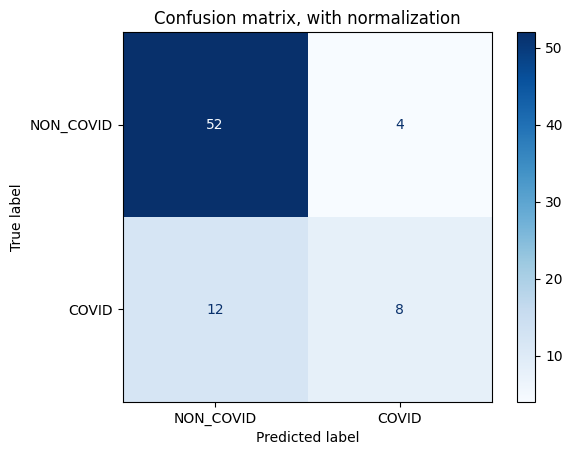

In [ ]:
class_names=['NON_COVID','COVID']
titles_options = [("Confusion matrix, with normalization", None),]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(KNN_clf, Y_Train, Y_Test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**BAGGING CLASSIFIER:**

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [ ]:
bc_clf=ensemble.BaggingClassifier(n_estimators=200)
bc_clf.fit(X_Train,X_Test)
bc_clf.score(Y_Train,Y_Test)

0.8026315789473685

In [ ]:
bc_clf.predict(Y_Train)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

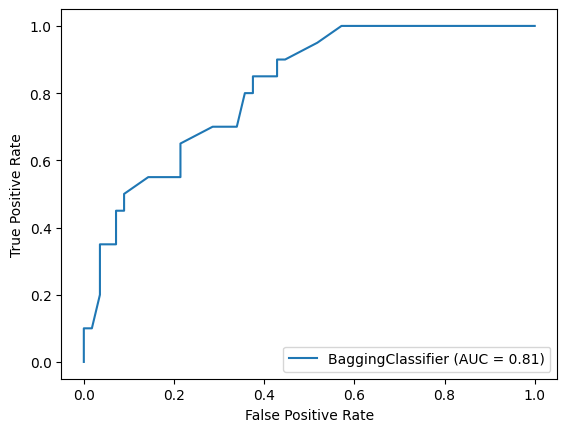

In [ ]:
 metrics.plot_roc_curve(bc_clf, Y_Train,Y_Test)  
 plt.show()

BAGGING CLASSIFIER-CONFUSION MATRIX:

Confusion matrix, with normalization
[[52  4]
 [11  9]]


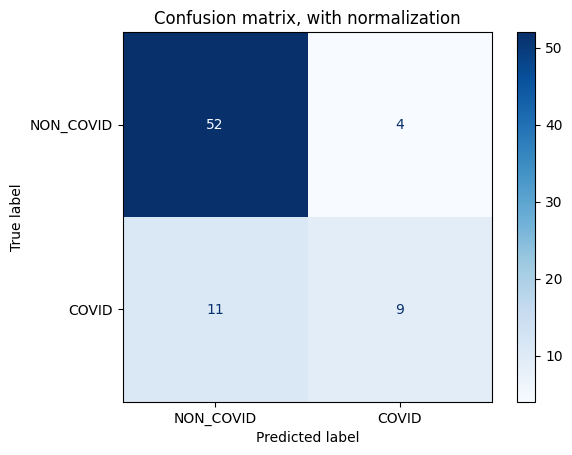

In [ ]:
class_names=['NON_COVID','COVID']
titles_options = [("Confusion matrix, with normalization", None),]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(bc_clf, Y_Train, Y_Test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**DECISION TREE CLASSIFIER:**
              
A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. The paths from root to leaf represent classification rules.

In [ ]:
dt_clf=tree.DecisionTreeClassifier(max_depth=9)
dt_clf.fit(X_Train,X_Test)
dt_clf.score(Y_Train,Y_Test)

0.8026315789473685

In [ ]:
dt_clf.predict(Y_Train)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

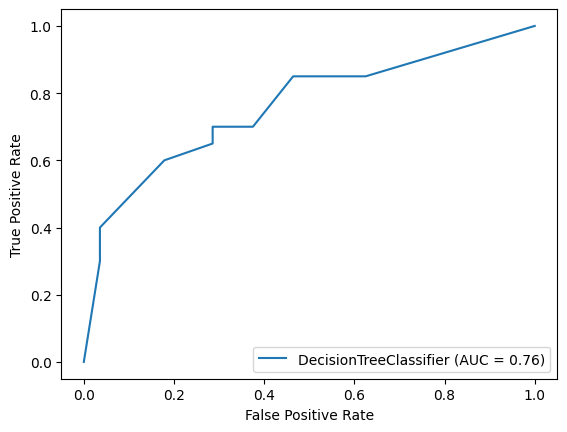

In [ ]:
 metrics.plot_roc_curve(dt_clf, Y_Train,Y_Test)  
 plt.show()

DECISION TREE CLASSIFIER-CONFUSION MATRIX:

Confusion matrix, with normalization
[[52  4]
 [11  9]]


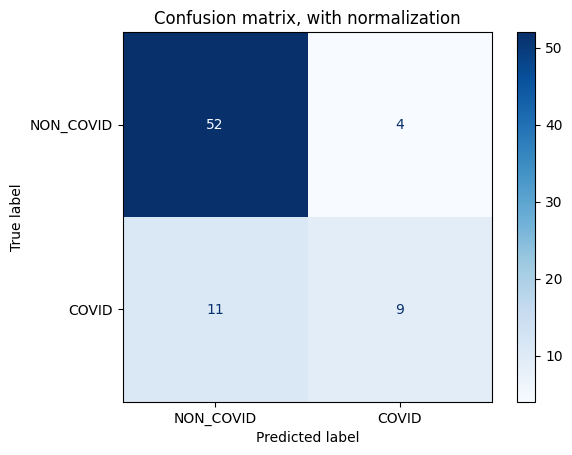

In [ ]:
class_names=['NON_COVID','COVID']
titles_options = [("Confusion matrix, with normalization", None),]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(dt_clf, Y_Train, Y_Test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**ADABOOST CLASSIFIER:**AdaBoost was the first really successful boosting algorithm developed for the purpose of binary classification. AdaBoost is short for Adaptive Boosting and is a very popular boosting technique which combines multiple “weak classifiers” into a single “strong classifier”. 

In [ ]:
abc_clf=ensemble.AdaBoostClassifier(n_estimators=150,algorithm='SAMME')
abc_clf.fit(X_Train,X_Test)
abc_clf.score(Y_Train,Y_Test)


0.8026315789473685

In [ ]:
abc_clf.predict(Y_Train)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

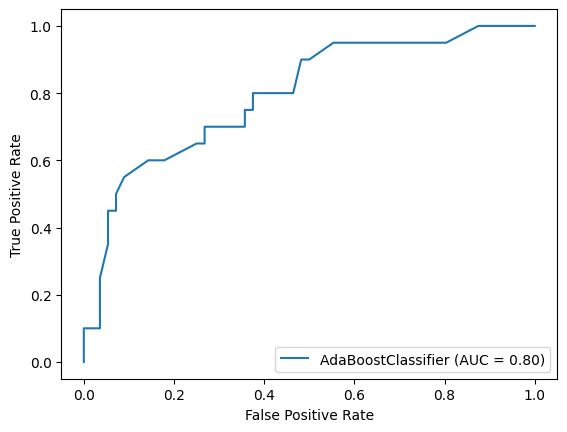

In [ ]:
 metrics.plot_roc_curve(abc_clf, Y_Train,Y_Test)  
 plt.show()

ADABOOST CLASSIFIER-CONFUSION MATRIX:

Confusion matrix, with normalization
[[53  3]
 [12  8]]


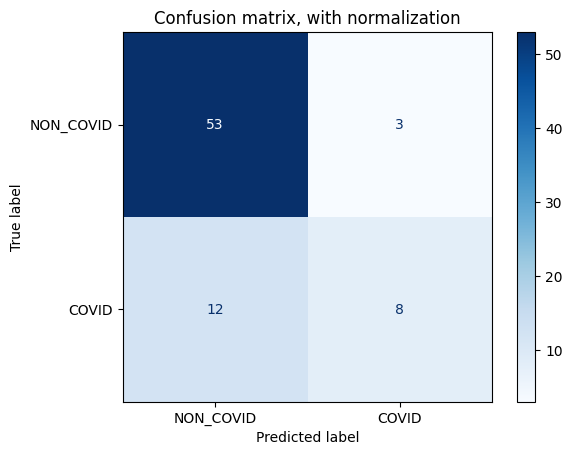

In [ ]:
class_names=['NON_COVID','COVID']
titles_options = [("Confusion matrix, with normalization", None),]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(abc_clf, Y_Train, Y_Test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**GRADIENT BOOSTING CLASSIFIER:**Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Gradient boosting models are becoming popular because of their effectiveness at classifying complex datasets.

In [ ]:
gbc_clf=ensemble.GradientBoostingClassifier(n_estimators=80, learning_rate=0.1)
gbc_clf.fit(X_Train,X_Test)
gbc_clf.score(Y_Train,Y_Test)

0.8289473684210527

In [ ]:
gbc_clf.predict(Y_Train)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

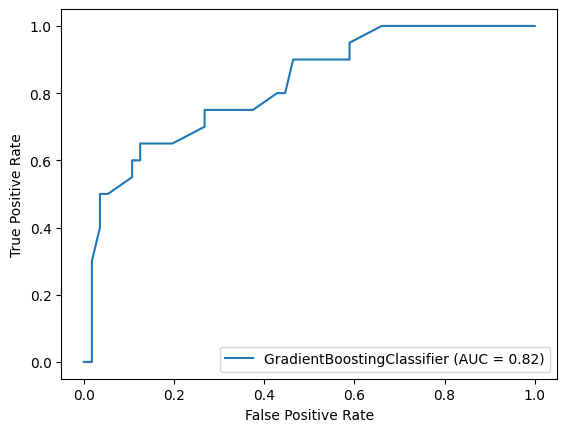

In [ ]:
 metrics.plot_roc_curve(gbc_clf, Y_Train,Y_Test)  
 plt.show()

GRADIENT BOOSTING CLASSIFIER-CONFUSION MATRIX:

Confusion matrix, with normalization
[[53  3]
 [10 10]]


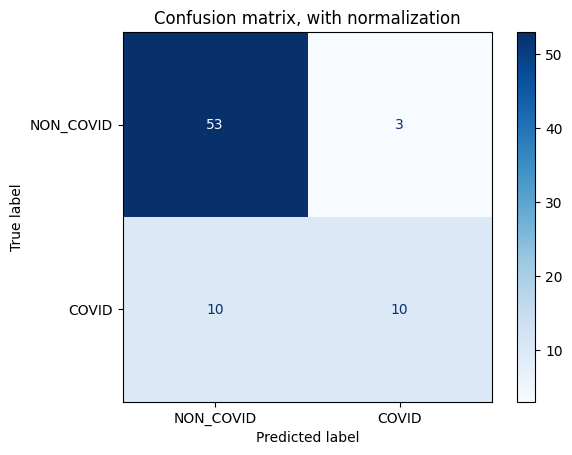

In [ ]:
class_names=['NON_COVID','COVID']
titles_options = [("Confusion matrix, with normalization", None),]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gbc_clf, Y_Train, Y_Test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()